In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
os.chdir('../../')

In [3]:
df = pd.read_parquet("data/processed/posts_reactions_df_topic_info.parquet")
df["ds"] = pd.to_datetime(df["date"])
df = df.sort_values(by="ds")
df["ds"] = df["ds"].dt.tz_localize(None)
df["date"] = df["date"].dt.tz_localize(None)

### Reaction Score histogram

In [4]:
sum(df.reactions_score.isna())

0

In [5]:
df.reactions_score

4451    1.000000
4452    1.000000
4453    1.000000
1252    1.000000
1253    1.000000
          ...   
5365    0.380952
5366    0.050562
4268   -0.558442
4269    0.721212
4270    0.620968
Name: reactions_score, Length: 5367, dtype: float64

<Figure size 1920x1440 with 0 Axes>

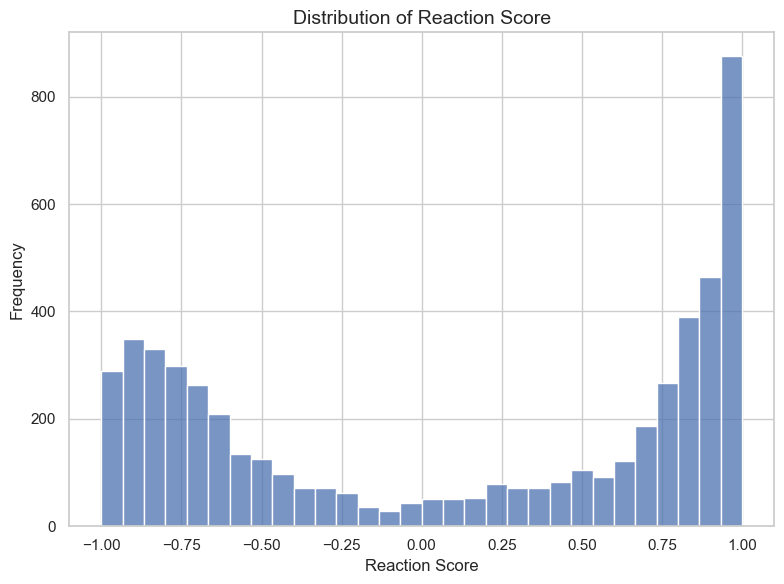

In [7]:
# Set the Seaborn style and Matplotlib figure resolution
sns.set(style="whitegrid")
plt.figure(dpi=300)

# Generate the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="reactions_score", bins=30, kde=False, color='b')#color="#8FD9FB")

# Add labels and title
plt.title("Distribution of Reaction Score", fontsize=14)
plt.xlabel("Reaction Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Save the figure with high resolution
plt.tight_layout()
plt.savefig("results/figures/reactions_score_histogram.png", dpi=300)

# Show the plot
plt.show()

In [8]:
pd.cut(df.reactions_score, 30).value_counts()

reactions_score
(0.933, 1.0]         873
(0.867, 0.933]       464
(0.8, 0.867]         380
(-0.933, -0.867]     347
(-0.867, -0.8]       339
(-1.002, -0.933]     294
(-0.8, -0.733]       293
(0.733, 0.8]         277
(-0.733, -0.667]     266
(-0.667, -0.6]       201
(0.667, 0.733]       178
(-0.6, -0.533]       135
(-0.533, -0.467]     127
(0.6, 0.667]         125
(0.467, 0.533]       104
(0.533, 0.6]          98
(-0.467, -0.4]        97
(0.4, 0.467]          82
(0.2, 0.267]          75
(-0.4, -0.333]        73
(0.267, 0.333]        72
(0.333, 0.4]          71
(-0.333, -0.267]      69
(-0.267, -0.2]        65
(0.133, 0.2]          56
(-0.0667, 0.0]        51
(0.0667, 0.133]       47
(0.0, 0.0667]         46
(-0.2, -0.133]        34
(-0.133, -0.0667]     28
Name: count, dtype: int64